In [1]:
import pandas as pd
from SMILESX import train


file_path = "./data/processed/Tg.csv"
prop = "tg"
augmentation = True
outdir = "outputs/"
data_name = "Tg_test"

bayopt_bounds = {
    "lstm_units": [3, 7],
    "dense_units": [3, 7],
    "embedding_dim": [3, 7],
    "batch_size": [5, 8],
    "learning_rate": [1e-4, 5*1e-1],
}
data = pd.read_csv(file_path)
data = data[["smiles", prop]].iloc[:1000, :]
data

,smiles,tg
0,*C*,-120.0
1,*CC*,-120.0
2,*CC(*)C,-3.0
3,*CC(*)CC,-24.1
4,*CC(*)CCC,-37.0
...,...,...
995,*Oc1ccc(C(C)(C)c2cccc(C(C)(C)c3ccc(Oc4ccc(C(=O...,149.0
996,*Oc1ccc(Oc2ccc(NC(=O)c3ccc(Oc4ccc(C(C)(C)c5ccc...,147.0
997,*Oc1ccc(NC(=O)c2ccc(Oc3ccc(C(C)(C)c4cccc(C(C)(...,147.0
998,*Oc1ccc(NC(=O)c2ccc(Oc3ccc(C(C)(C)c4cccc(C(C)(...,167.0


***Sampling and splitting of the dataset.***

Train/valid/test splits: 0.80/0.10/0.10


Setup Polymer Tokens.
***Data augmentation is True***

Enumerated SMILES:
Number of tokens only present in a training set:35

Number of tokens only present in a validation set27
Is the validation set a subset of the training set:True
What are the tokens by which they differ:set()

Number of tokens only present in a test set:31
Is the test set a subset of the training set:True
What are the tokens by which they differ:set()
Is the test set a subset of the validation set:False
What are the tokens by which they differ:{'o', '7', '8', 's'}

Full vocabulary: ['O', '#', 'F', '4', '8', '-', '%10', 'S', 'o', '6', ')', 'n', '\\', '*', '(', 'N', '3', '[O-]', 'I', ' ', '[N+]', '2', 'C', 'P', 'Cl', '=', '/', '9', '1', 's', '5', '%11', 'Br', 'c', '7']
Of size: 35

Maximum length of tokenized SMILES: 147 tokens (termination spaces included)



[I 2024-03-06 14:32:34,378] A new study created in memory with name: no-name-32c7888e-4708-468e-b801-cc4b1dba41d2
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4060 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 27.9 K
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
27.9 K    Trainable params
0        

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:32:51,544] Trial 0 finished with value: 51.5510139465332 and parameters: {'n_lstm_units': 3, 'n_dense_units': 3, 'n_embedding_dim': 7, 'n_batch_size': 7, 'learning_rate': 0.04160873400322772}. Best is trial 0 with value: 51.5510139465332.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 4.3 K 
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
4.3 K     Trainable params
0         Non-trainable params
4.3 K     Total params
0.017     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:33:16,927] Trial 1 finished with value: 52.13346862792969 and parameters: {'n_lstm_units': 3, 'n_dense_units': 4, 'n_embedding_dim': 4, 'n_batch_size': 5, 'learning_rate': 0.42653374606822647}. Best is trial 0 with value: 51.5510139465332.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 299 K 
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
299 K     Trainable params
0         Non-trainable params
299 K     Total params
1.199     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:33:42,298] Trial 2 finished with value: 24.429943084716797 and parameters: {'n_lstm_units': 7, 'n_dense_units': 6, 'n_embedding_dim': 7, 'n_batch_size': 5, 'learning_rate': 0.0012888325493054026}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 28.4 K
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
28.4 K    Trainable params
0         Non-trainable params
28.4 K    Total params
0.114     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:33:57,928] Trial 3 finished with value: 38.30659866333008 and parameters: {'n_lstm_units': 3, 'n_dense_units': 5, 'n_embedding_dim': 7, 'n_batch_size': 7, 'learning_rate': 0.006104620344956576}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 153 K 
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
153 K     Trainable params
0         Non-trainable params
153 K     Total params
0.616     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:34:16,926] Trial 4 finished with value: 51.815914154052734 and parameters: {'n_lstm_units': 7, 'n_dense_units': 3, 'n_embedding_dim': 4, 'n_batch_size': 7, 'learning_rate': 0.0006831814165069435}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 69.0 K
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
69.0 K    Trainable params
0         Non-trainable params
69.0 K    Total params
0.276     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:34:31,105] Trial 5 finished with value: 31.882421493530273 and parameters: {'n_lstm_units': 5, 'n_dense_units': 7, 'n_embedding_dim': 7, 'n_batch_size': 8, 'learning_rate': 0.00427501541774782}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 17.3 K
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
17.3 K    Trainable params
0         Non-trainable params
17.3 K    Total params
0.069     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:34:55,043] Trial 6 finished with value: 30.66556739807129 and parameters: {'n_lstm_units': 5, 'n_dense_units': 5, 'n_embedding_dim': 4, 'n_batch_size': 5, 'learning_rate': 0.00202571873129591}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 30.2 K
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
30.2 K    Trainable params
0         Non-trainable params
30.2 K    Total params
0.121     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:35:13,271] Trial 7 finished with value: 61.371646881103516 and parameters: {'n_lstm_units': 3, 'n_dense_units': 7, 'n_embedding_dim': 7, 'n_batch_size': 6, 'learning_rate': 0.34435541098966616}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 4.3 K 
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
4.3 K     Trainable params
0         Non-trainable params
4.3 K     Total params
0.017     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:35:26,803] Trial 8 finished with value: 39.546913146972656 and parameters: {'n_lstm_units': 3, 'n_dense_units': 4, 'n_embedding_dim': 4, 'n_batch_size': 8, 'learning_rate': 0.018036500712438765}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 16.2 K
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
16.2 K    Trainable params
0         Non-trainable params
16.2 K    Total params
0.065     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:35:51,267] Trial 9 finished with value: 42.15370559692383 and parameters: {'n_lstm_units': 5, 'n_dense_units': 6, 'n_embedding_dim': 3, 'n_batch_size': 5, 'learning_rate': 0.09146297024432802}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 224 K 
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
224 K     Trainable params
0         Non-trainable params
224 K     Total params
0.899     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:36:12,184] Trial 10 finished with value: 45.99885940551758 and parameters: {'n_lstm_units': 7, 'n_dense_units': 6, 'n_embedding_dim': 6, 'n_batch_size': 6, 'learning_rate': 0.0001138773342841889}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 59.1 K
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
59.1 K    Trainable params
0         Non-trainable params
59.1 K    Total params
0.236     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:36:36,601] Trial 11 finished with value: 37.02037048339844 and parameters: {'n_lstm_units': 6, 'n_dense_units': 5, 'n_embedding_dim': 5, 'n_batch_size': 5, 'learning_rate': 0.0011892456991965234}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 63.3 K
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
63.3 K    Trainable params
0         Non-trainable params
63.3 K    Total params
0.253     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:36:55,301] Trial 12 finished with value: 42.08128356933594 and parameters: {'n_lstm_units': 6, 'n_dense_units': 6, 'n_embedding_dim': 5, 'n_batch_size': 6, 'learning_rate': 0.0009545313448245029}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 5.6 K 
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
5.6 K     Trainable params
0         Non-trainable params
5.6 K     Total params
0.023     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:37:20,100] Trial 13 finished with value: 48.87088394165039 and parameters: {'n_lstm_units': 4, 'n_dense_units': 5, 'n_embedding_dim': 3, 'n_batch_size': 5, 'learning_rate': 0.00018447819340878266}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 84.4 K
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
84.4 K    Trainable params
0         Non-trainable params
84.4 K    Total params
0.338     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:37:44,532] Trial 14 finished with value: 26.725099563598633 and parameters: {'n_lstm_units': 6, 'n_dense_units': 6, 'n_embedding_dim': 6, 'n_batch_size': 5, 'learning_rate': 0.0025012382602507487}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 84.4 K
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
84.4 K    Trainable params
0         Non-trainable params
84.4 K    Total params
0.338     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:38:03,336] Trial 15 finished with value: 35.710105895996094 and parameters: {'n_lstm_units': 6, 'n_dense_units': 6, 'n_embedding_dim': 6, 'n_batch_size': 6, 'learning_rate': 0.0003453047538532196}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 241 K 
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
241 K     Trainable params
0         Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:38:28,952] Trial 16 finished with value: 33.373966217041016 and parameters: {'n_lstm_units': 7, 'n_dense_units': 7, 'n_embedding_dim': 6, 'n_batch_size': 5, 'learning_rate': 0.014097682783468984}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 84.4 K
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
84.4 K    Trainable params
0         Non-trainable params
84.4 K    Total params
0.338     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:38:47,816] Trial 17 finished with value: 29.042600631713867 and parameters: {'n_lstm_units': 6, 'n_dense_units': 6, 'n_embedding_dim': 6, 'n_batch_size': 6, 'learning_rate': 0.002724745443341289}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 241 K 
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
241 K     Trainable params
0         Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:39:13,249] Trial 18 finished with value: 29.817291259765625 and parameters: {'n_lstm_units': 7, 'n_dense_units': 7, 'n_embedding_dim': 6, 'n_batch_size': 5, 'learning_rate': 0.0004204539392561088}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 120 K 
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
120 K     Trainable params
0         Non-trainable params
120 K     Total params
0.481     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:39:32,485] Trial 19 finished with value: 34.31386947631836 and parameters: {'n_lstm_units': 6, 'n_dense_units': 4, 'n_embedding_dim': 7, 'n_batch_size': 6, 'learning_rate': 0.01137184541139788}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 187 K 
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
187 K     Trainable params
0         Non-trainable params
187 K     Total params
0.749     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:39:57,802] Trial 20 finished with value: 31.233301162719727 and parameters: {'n_lstm_units': 7, 'n_dense_units': 6, 'n_embedding_dim': 5, 'n_batch_size': 5, 'learning_rate': 0.0019022943778338759}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 84.4 K
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
84.4 K    Trainable params
0         Non-trainable params
84.4 K    Total params
0.338     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:40:16,746] Trial 21 finished with value: 28.52410888671875 and parameters: {'n_lstm_units': 6, 'n_dense_units': 6, 'n_embedding_dim': 6, 'n_batch_size': 6, 'learning_rate': 0.0029828511115450583}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 84.4 K
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
84.4 K    Trainable params
0         Non-trainable params
84.4 K    Total params
0.338     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:40:35,317] Trial 22 finished with value: 32.95644760131836 and parameters: {'n_lstm_units': 6, 'n_dense_units': 6, 'n_embedding_dim': 6, 'n_batch_size': 6, 'learning_rate': 0.004263549202830494}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 43.1 K
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
43.1 K    Trainable params
0         Non-trainable params
43.1 K    Total params
0.173     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:40:59,749] Trial 23 finished with value: 31.549560546875 and parameters: {'n_lstm_units': 5, 'n_dense_units': 7, 'n_embedding_dim': 6, 'n_batch_size': 5, 'learning_rate': 0.0005294010575123426}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 299 K 
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
299 K     Trainable params
0         Non-trainable params
299 K     Total params
1.199     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
[I 2024-03-06 14:41:19,134] Trial 24 finished with value: 29.826892852783203 and parameters: {'n_lstm_units': 7, 'n_dense_units': 6, 'n_embedding_dim': 7, 'n_batch_size': 7, 'learning_rate': 0.0014500725385636437}. Best is trial 2 with value: 24.429943084716797.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | LSTMAttention    | 299 K 
1 | train_metrics | MetricCollection | 0     
2 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
299 K     Trainable params
0         Non-trainable params
299 K     Total params
1.199     Total estimated model params size (MB)


Best Params
LSTM units       | 128
Dense units      | 64
Embedding units  | 128
Batch size       | 32
leaning rate     | 0.0012888325493054026

***Training of the best model.***



Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


Training Finished!!!
Best val_loss @ Epoch #57

***Predictions from the best model.***

For the training set:
MAE: 3.2369 RMSE: 12.6131 R^2: 0.9848
For the validation set:
MAE: 19.4996 RMSE: 28.3737 R^2: 0.8395
For the test set:
MAE: 22.5298 RMSE: 32.1105 R^2: 0.9159


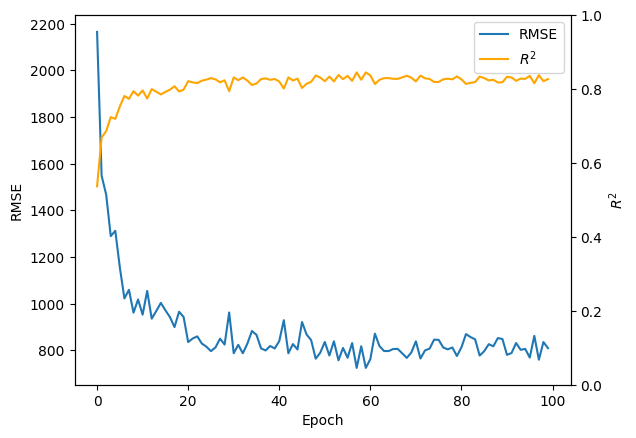

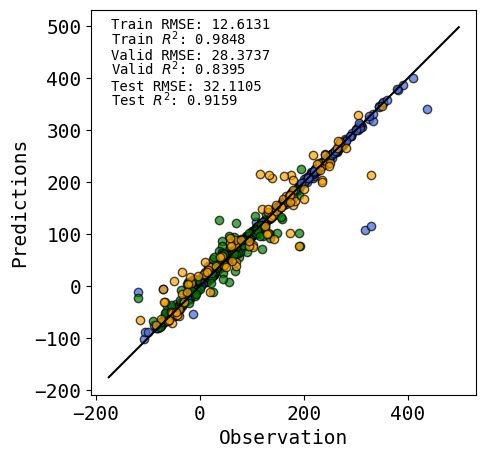

In [2]:
model = train.main(
    data=data,
    data_name=data_name,
    bayopt_bounds=bayopt_bounds,
    augmentation=augmentation,
    outdir="./outputs/",
    bayopt_n_epochs=5,
    bayopt_n_iters=25,
    n_epochs=100,
    tf16=False,
    seed=1
)

In [3]:
# checkpoint_path = r"D:\programming\python\chem\prediction\SMILES-X\outputs\test\Augm\training\epoch=0-step=65.ckpt"
# import torch
# state_dict = torch.load(checkpoint_path)
# state_dict

In [4]:
# import pickle

# with open(r"D:\programming\python\chem\prediction\SMILES-X\outputs\test\Augm\training\best_hyper_params.pkl", "rb") as f:
#     best_hyper_params = pickle.load(f)

# test_model = LSTMAttention.load_from_checkpoint(
#     checkpoint_path,
#     token_size=best_hyper_params[0],
#     learning_rate=best_hyper_params[5],
#     lstm_units=best_hyper_params[1],
#     dense_units=best_hyper_params[2],
#     embedding_dim=best_hyper_params[3],
#     map_location=torch.device("cpu")
# )